# NLP. Lab 7. Embeddings


## Distributional semantics

Distributional semantics is a theory in linguistics and natural language processing that posits that the meaning of words can be inferred from the contexts in which they appear. According to this theory, words that occur in similar contexts are likely to have similar meanings.


## Models for computing word representations


### Continuous Bag of Words (CBOW)

In the CBOW model, the goal is to predict a target word based on its surrounding context words within a fixed window size. The model takes as input a context window (a sequence of surrounding words) and predicts the target word.


### Skip-gram

In contrast to CBOW, the Skip-gram model aims to predict the surrounding context words given a target word. The model takes as input a target word and predicts the context words within a fixed window size around the target word.


### Comparison:

- CBOW:
  - Pros: Faster training time, better performance for frequent words.
  - Cons: Poor performance for infrequent words, ignores word order.
- Skip-gram:
  - Pros: Captures fine-grained semantic information, performs well for infrequent words, preserves word order.
  - Cons: Slower training time, requires more data.


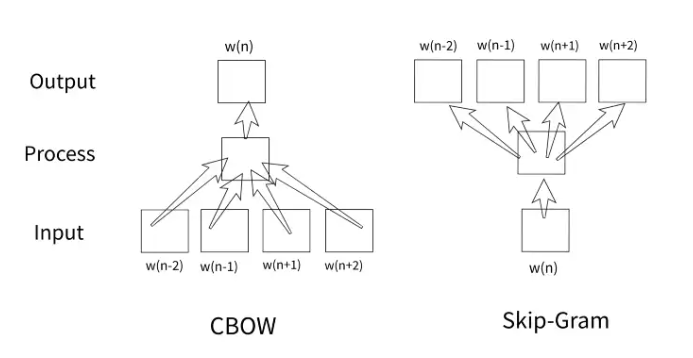


## Word embeddings

- **fastText Embeddings**: fastText is an extension of word2vec that incorporates subword information into the embedding learning process. It represents words as the sum of the embeddings of their constituent character n-grams, allowing it to handle out-of-vocabulary words and capture morphological information.
- **GloVe (Global Vectors for Word Representation) Embeddings**: GloVe is a word embedding model that learns word vectors by factorizing the co-occurrence matrix of words in a corpus. It leverages global statistical information to capture word semantics and has been shown to perform well on various NLP tasks.


## fastText


In [1]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz && gzip -dv cc.en.300.bin.gz

--2024-02-28 16:34:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: 'cc.en.300.bin.gz'

cc.en.300.bin.gz    100%[===================>]   4.19G   232MB/s    in 20s     

2024-02-28 16:35:10 (213 MB/s) - 'cc.en.300.bin.gz' saved [4503593528/4503593528]

cc.en.300.bin.gz:	 37.8% -- replaced with cc.en.300.bin


In [2]:
import fasttext

model = fasttext.load_model("cc.en.300.bin")

In [3]:
vector = model.get_word_vector("hello")
print(vector.shape)

(300,)


In [4]:
nearest_neighbors = model.get_nearest_neighbors("hello")
print(nearest_neighbors)

[(0.7143728733062744, 'hellow'), (0.7095366716384888, 'hello.'), (0.703833818435669, 'hi'), (0.6944323182106018, 'hullo'), (0.6912142038345337, 'hello-'), (0.663975715637207, 'Hello'), (0.6563249230384827, 'hello.I'), (0.6529381275177002, 'howdy'), (0.6283847689628601, 'hellooo'), (0.6235803365707397, 'hellooooo')]


In [5]:
analogy_result = model.get_analogies("king", "man", "woman", k=1)
print("Analogy relationship: king - man + woman =", analogy_result)

Analogy relationship: king - man + woman = [(0.7554811835289001, 'queen')]


The analogy relationship is typically explored through vector arithmetic, where the difference between word vectors captures the semantic relationship between words.

For example, in the famous analogy relationship "king - man + woman = queen," we compute the vector differences between "king" and "man," and "woman" is added to the result. The resulting vector is expected to be closest to the vector representation of "queen" in the embedding space.


## GloVe


In [6]:
import gensim.downloader as api

# Load the pre-trained GloVe model
glove_model = api.load("glove-wiki-gigaword-100")


# Find similarity between two words
similarity = glove_model.similarity("cat", "dog")
print("Similarity between 'cat' and 'dog':", similarity)

# Find analogy relationship
analogy = glove_model.most_similar(positive=["king", "woman"], negative=["man"])
print("Analogy relationship: king - man + woman =", analogy)

[==================================================] 100.0% 128.1/128.1MB downloaded
Similarity between 'cat' and 'dog': 0.8798075
Analogy relationship: king - man + woman = [('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


## Vector databases

A vector database is a specialized database that stores and efficiently queries high-dimensional vectors, such as word or sentence embeddings. These databases enable fast similarity search and retrieval of similar vectors based on distance metrics such as cosine similarity or Euclidean distance.


In [7]:
%%capture
!pip install chromadb

In [8]:
import chromadb

chroma_client = chromadb.Client()

In [9]:
collection = chroma_client.create_collection(name="test_collection")

In [10]:
documents = [
    "The latest iPhone model comes with impressive features and a powerful camera.",
    "Exploring the beautiful beaches and vibrant culture of Bali is a dream for many travelers.",
    "Einstein's theory of relativity revolutionized our understanding of space and time.",
    "Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.",
    "The American Revolution had a profound impact on the birth of the United States as a nation.",
    "Regular exercise and a balanced diet are essential for maintaining good physical health.",
    "Leonardo da Vinci's Mona Lisa is considered one of the most iconic paintings in art history.",
    "Climate change poses a significant threat to the planet's ecosystems and biodiversity.",
    "Startup companies often face challenges in securing funding and scaling their operations.",
    "Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'",
]

genres = [
    "technology",
    "travel",
    "science",
    "food",
    "history",
    "fitness",
    "art",
    "climate change",
    "business",
    "music",
]

collection.add(
    documents=documents,
    ids=[f"id{i}" for i in range(len(documents))],
    metadatas=[{"genre": g} for g in genres],
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 32.6MiB/s]


In [11]:
results = collection.query(query_texts=["I'm hungry"], n_results=1)
results

{'ids': [['id3']],
 'distances': [[1.7825171947479248]],
 'metadatas': [[{'genre': 'food'}]],
 'embeddings': None,
 'documents': [['Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.']],
 'uris': None,
 'data': None}

In [12]:
results = collection.query(query_texts=["sport"], n_results=1)
results

{'ids': [['id5']],
 'distances': [[1.5580840110778809]],
 'metadatas': [[{'genre': 'fitness'}]],
 'embeddings': None,
 'documents': [['Regular exercise and a balanced diet are essential for maintaining good physical health.']],
 'uris': None,
 'data': None}

## Competition

[Competition](https://www.kaggle.com/t/86e66334af714ec2b28cc1ef246f0e42)

> Goal of competition is to classify descriptions into categories with use of `fasttext`


In [13]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/nlp-week-7-embeddings/train.csv")
train_df.head()

,class,text
0,12,Rules Changed Up is the debut studio album by...
1,14,Back is a novel written by British writer Hen...
2,14,Love and Glory (ISBN 0-385-29261-9) is a 1983...
3,13,Max Manus: Man of War is a 2008 Norwegian bio...
4,7,The former Ahavas Sholem Synagogue building w...
